In [33]:
import numpy as np
import torch
from libs.seq2seq_model import RNNModel
from libs.lfgenerator import Shift
from pytorch_lightning import Trainer
import matplotlib.pyplot as plt

In [34]:
# model = S4DModel.load_from_checkpoint("runs/s4d_shift/version_2/checkpoints/s4d_shift-epoch=100-valid_loss=3.27e-08.ckpt")
model = RNNModel.load_from_checkpoint("/home/shida/seq2seq-data-generator/runs/tanhRNN/version_7/checkpoints/tanhRNN-epoch=155-valid_loss=9.75e-02.ckpt")
# generator = Shift({'input_dim':1, 'path_len':5 ,'shift':[1], 'data_num':2200})

# x, y = generator.generate()
# x = torch.tensor(x)
# y = torch.tensor(y)
# dataset = torch.utils.data.TensorDataset(x, y)
# loader = torch.utils.data.DataLoader(dataset, batch_size=256,drop_last=True)

In [35]:
# trainer = Trainer(accelerator="gpu", devices=[3], precision=64)
# trainer.validate(model=model, dataloaders=loader)

In [36]:
# x[0]

In [37]:
# model(x)[0]

In [38]:
id = torch.zeros(1,200,3)
id[0,0,0] = 1.0

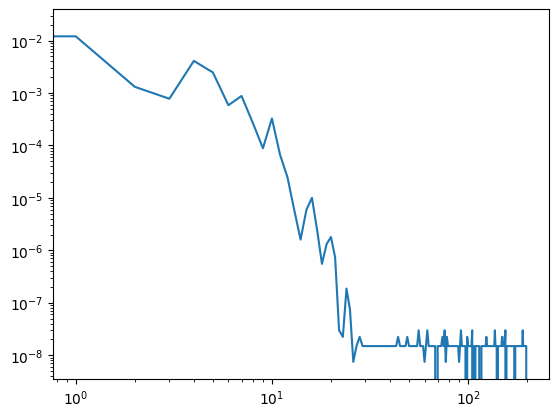

In [41]:

model.return_sequence = True
output = model(id)[0,:].detach().cpu().numpy()
output -= output[-1]
output = np.abs(output)
plt.plot(output)
plt.yscale("log")
plt.xscale("log")